# EBL  

In [1]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_dominguez=EBLAbsorptionTemplate.from_name('Dominguez_2010')
ebl_finke=EBLAbsorptionTemplate.from_name('Finke_2010')
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')


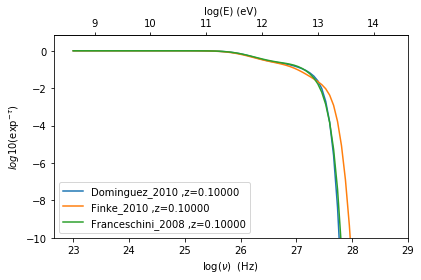

In [2]:
z=0.1
nu=np.logspace(23,30,100)
ebl_dominguez.parameters.z_cosm.val=z
ebl_dominguez.eval(nu=nu)
ebl_finke.parameters.z_cosm.val=z
ebl_finke.eval(nu=nu)
ebl_franceschini.parameters.z_cosm.val=z
ebl_franceschini.eval(nu=nu)
p=ebl_dominguez.plot_model()
ebl_finke.plot_model(p)
ebl_franceschini.plot_model(p)
p.rescale(y_min=-10,x_max=29)

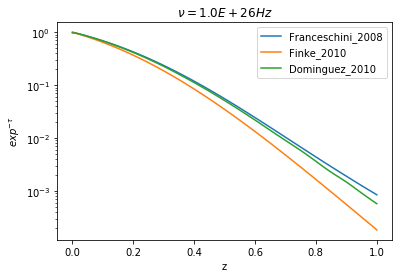

In [3]:
nu=1E26
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

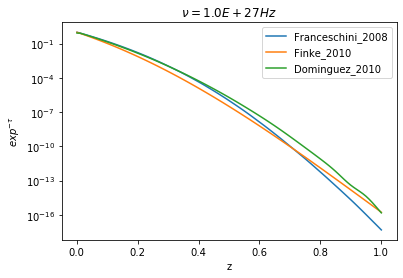

In [4]:
%matplotlib inline
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
nu=1E27
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

## Combine a Jet model with the EBL model 

As first step, we define our Jet model

In [5]:
from jetset.jet_model import Jet
from jetset.model_manager import FitModel

my_jet=Jet(electron_distribution='lppl',name='jet_leptonic')

In [6]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [7]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [8]:
composite_model.show_pars()

    model name          name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------------- ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
     jet_leptonic                N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
     jet_leptonic                s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
     jet_leptonic                r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
     jet_leptonic gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04

Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [9]:
composite_model.link_par(par_name='z_cosm',model_name_list=['jet_leptonic'],root_model_name='Franceschini_2008')

In [10]:
composite_model.show_pars()

    model name                name                  par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------------- --------------------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     jet_leptonic                        gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     jet_leptonic                        gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
     jet_leptonic                           N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
     jet_leptonic                           s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
     jet_leptonic                           r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
     j

These methods are alternative ways to set a parameter in a composite model

In [11]:
composite_model.jet_leptonic.parameters.z_cosm.val=0.1
composite_model.set_par('jet_leptonic','z_cosm',0.1)
composite_model.set_par(my_jet,'z_cosm',0.1)

Since as default, added components are summed together, so we need to define the correct multiplicative for for the composite model.

In [12]:
composite_model.show_model_components()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

-------------------------------------------------------------------------------------------------------------------


This can be done just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [14]:
composite_model.composite_expr='jet_leptonic*Franceschini_2008'

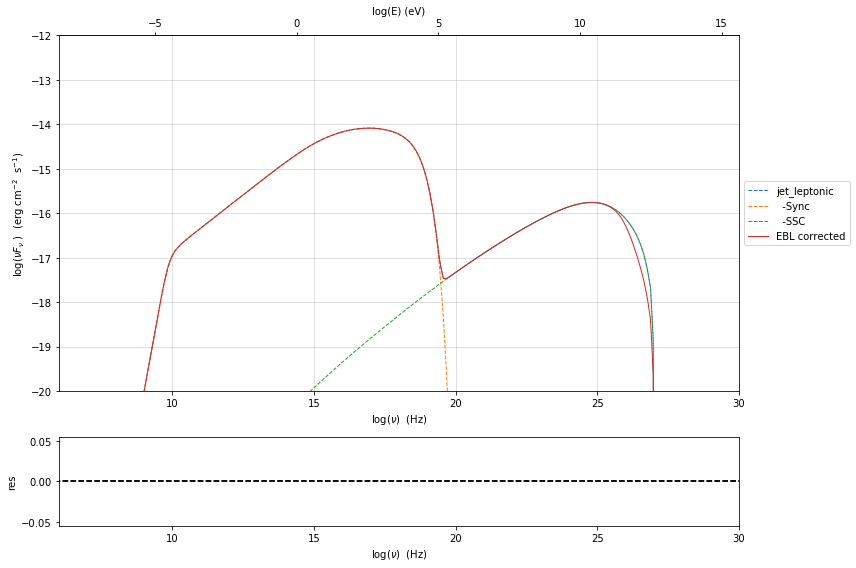

In [15]:
composite_model.jet_leptonic.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)